# Part 1 -  Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [180]:
df.corr()['log_price'].sort_values(ascending=False)

log_price        1.000000
price            0.891753
grade            0.703761
sqft_living      0.695194
sqft_living15    0.619347
sqft_above       0.601611
bathrooms        0.551216
lat              0.448721
bedrooms         0.350866
view             0.344667
sqft_basement    0.313078
floors           0.310616
waterfront       0.170731
yr_renovated     0.106866
sqft_lot         0.100027
sqft_lot15       0.092300
yr_built         0.080618
long             0.050854
Unnamed: 0       0.040461
condition        0.038804
year             0.004932
id              -0.003755
month           -0.013104
day             -0.019908
zipcode         -0.038932
age             -0.080618
Name: log_price, dtype: float64

In [164]:
df_corr_heatmap = df.drop(columns=['Unnamed: 0', 'id', 'lat', 'long', 'year', 'month', 'day',])
corr = df_corr_heatmap.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=1, cbar_kws={"shrink": 1})

In [169]:
# corr = df_corr_heatmap.corr()['price'].sort_values(ascending=False)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# fig, ax = plt.subplots(figsize=(30, 15))
# ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
#             square=True, linewidths=1, cbar_kws={"shrink": 1})

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [139]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  10/13/2014  221900.0         3       1.00   
1           1  6414100192   12/9/2014  538000.0         3       2.25   
2           2  5631500400   2/25/2015  180000.0         2       1.00   
3           3  2487200875   12/9/2014  604000.0         4       3.00   
4           4  1954400510   2/18/2015  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...      lat     long  \
0         1180      5650     1.0         0.0  ...  47.5112 -122.257   
1         2570      7242     2.0         0.0  ...  47.7210 -122.319   
2          770     10000     1.0         0.0  ...  47.7379 -122.233   
3         1960      5000     1.0         0.0  ...  47.5208 -122.393   
4         1680      8080     1.0         0.0  ...  47.6168 -122.045   

   sqft_living15  sqft_lot15  year  month  day  month_year   price_bands  \
0           1340        5650  2014     10   13     13-2014  200K to 300K   
1           1690        7639  2014     12    9      9-2014  500K to 600K   
2           2720        8062  2015      2   25     25-2015  100K to 200K   
3           1360        5000  2014     12    9      9-2014  600K to 700K   
4           1800        7503  2015      2   18     18-2015  500K to 600K   

   yr_built_bands  
0           1950s  
1           1950s  
2           1930s  
3           1960s  
4           1980s  

[5 rows x 28 columns]

In [119]:
feilds = list(df.columns)
feilds

['Unnamed: 0',
 'id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month',
 'day',
 'month_year',
 'price_bands',
 'yr_built_bands',
 'age',
 'is_ren',
 'sale_count',
 'age_since_ren',
 'time_to_ren']

### Datasets Sample Size 

In [113]:
total_housing_units = 902107 # From American Comunity Survey 2017
housing_units = df.shape[0]
print("Total Number of properties in KC:", total_housing_units) 
print("Total Number of properties in DataSet:", len(unique_ids))
print("Percentage of properties:", round((((len(unique_ids))/total_housing_units)*100),3),"%")

Total Number of properties in KC: 902107
Total Number of properties in DataSet: 21418
Percentage of properties: 2.374 %


## Add in Correlation Calculator

In [3]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2): # Calculates the "r" value.
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 3)

## Add Regrestion Line Calculator

In [110]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def calc_intercept(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def reg_basic_and_plot(X, Y, title, X_Lable, Y_Lable):
    
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Slope:', round(m, 2))
    print ('Y-Intercept:', round(c, 2))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

def compare_reg_basic_and_plot(X, Y, L, P, title, X_Lable, Y_Lable):
    
    # X & Y Results
    m1 = calc_slope(X,Y)
    c1 = calc_intercept(X,Y)
    Y_pred = reg_line(m1, c1, X)
    r1 = correlation(X,Y)
    r_sqrd1 = r_squared(Y,Y_pred)
    
    print ('Data_1 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m1, 2))
    print ('Y-Intercept:', round(c1, 2))
    print ('Correlation:', r1)
    print ('R-Squared:', round(r_sqrd1, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m1, 2),'* X +', round(c1, 2))
    
    # L & P Results
    m2 = calc_slope(L,P)
    c2 = calc_intercept(L,P)
    P_pred = reg_line(m2, c2, L)
    r2 = correlation(X,Y)
    r_sqrd2 = r_squared(Y,Y_pred)
    
    print ('\n\nData_2 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(L))
    print ('Slope:', round(m2, 2))
    print ('Y-Intercept:', round(c2, 2))
    print ('Correlation:', r2)
    print ('R-Squared:', round(r_sqrd2, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m2, 2),'* X +', round(c2, 2))
    
    
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='blue', label='Data_1')
    plt.plot(X, Y_pred, label='regression line_1')
    plt.scatter(L, P, color='orange', label='Data_2')
    plt.plot(L, P_pred, label='regression line_2')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

## Create:  "age" column

In [172]:
now = 2016

In [173]:
df['age'] = now - df['yr_built']

## Create a column Renovated Yes/No

In [7]:
is_renovated = df['yr_renovated']
is_renovated.describe().apply(lambda x: format(x, 'f'))
temp = []
for ren in is_renovated:
    if ren > 0:
        temp.append('renovated')
    else:
        temp.append('not_renovated')
        
df['is_ren'] = temp
        

In [8]:
df['is_ren'].unique()

array(['not_renovated', 'renovated'], dtype=object)

# Create: Sale Count column
        - shows if this property is on the list mulitiple times

In [9]:
# dup_houses_count = dup_counter(df['id'])
# print(len(dup_houses_count))
# dup_houses_count[:5]

Create a new DataFrame soreted by Date sold.

In [10]:
df.head()

Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  10/13/2014  221900.0         3       1.00   
1           1  6414100192   12/9/2014  538000.0         3       2.25   
2           2  5631500400   2/25/2015  180000.0         2       1.00   
3           3  2487200875   12/9/2014  604000.0         4       3.00   
4           4  1954400510   2/18/2015  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_living15  sqft_lot15  \
0         1180      5650     1.0         0.0  ...           1340        5650   
1         2570      7242     2.0         0.0  ...           1690        7639   
2          770     10000     1.0         0.0  ...           2720        8062   
3         1960      5000     1.0         0.0  ...           1360        5000   
4         1680      8080     1.0         0.0  ...           1800        7503   

   year  month  day  month_year   price_bands  yr_built_bands  age  \
0  2014     10   13     13-2014  200K to 300K           1950s   61   
1  2014     12    9      9-2014  500K to 600K           1950s   65   
2  2015      2   25     25-2015  100K to 200K           1930s   83   
3  2014     12    9      9-2014  600K to 700K           1960s   51   
4  2015      2   18     18-2015  500K to 600K           1980s   29   

          is_ren  
0  not_renovated  
1      renovated  
2  not_renovated  
3  not_renovated  
4  not_renovated  

[5 rows x 30 columns]

In [11]:
df_sorted_date = df

In [12]:
pd.to_datetime(df_sorted_date['date'], format='%Y%m%d', errors='ignore')

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21590     5/21/2014
21591     2/23/2015
21592     6/23/2014
21593     1/16/2015
21594    10/15/2014
Name: date, Length: 21595, dtype: object

In [13]:
df_sorted_date.set_index('date', inplace=True)

In [14]:
df_sorted_date.sort_index(ascending=False, inplace=True)

Create list of unique values:

In [15]:
unique_ids = list(df['id'].unique())
unique_ids[:4]

[7227800055, 1421069123, 3323069084, 7227500450]

Add a counter column to the datalist:

In [16]:
def id_with_counter(data):
    dup_dict = {}
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
            dup_dict[val] = 1

    return dup_dict

In [17]:
unique_ids_dict = id_with_counter(unique_ids)
unique_ids_dict[1000102]

1

Now we use this to iterate through the DataFrame list of id's. If it finds the id it; 

first appends the number next to the unique_id list
the added 1 to that number.

In [18]:
def ocurrance_finder(data, unique_dict):
    new_list = []
    
    for d in data:
        for u, v in unique_dict.items():
            if d == u:
                new_list.append(v)
                unique_dict[u] += 1
    return new_list

Apply occurance finder to the soreted data set.

In [19]:
sale_count_list = ocurrance_finder(df_sorted_date['id'], unique_ids_dict)
print(len(sale_count_list))
df_sorted_date.shape

21595


(21595, 29)

In [20]:
df_sorted_date['sale_count'] = sale_count_list

In [21]:
df_sorted_date.head()

Unnamed: 0          id      price  bedrooms  bathrooms  sqft_living  \
date                                                                            
9/9/2014       10904  7227800055   199500.0         4       2.00         1750   
9/9/2014       12826  1421069123   214000.0         3       1.00         1020   
9/9/2014        1322  3323069084   620000.0         4       2.50         1840   
9/9/2014        8204  7227500450   222900.0         2       1.00          860   
9/9/2014       18353  1370803445  1140000.0         4       1.75         3080   

          sqft_lot  floors  waterfront  view  ...  sqft_lot15  year  month  \
date                                          ...                            
9/9/2014      8116     1.0         0.0   0.0  ...        7865  2014      9   
9/9/2014      9147     1.0         0.0   0.0  ...        9700  2014      9   
9/9/2014    220308     2.0         0.0   0.0  ...       65340  2014      9   
9/9/2014      5800     1.0         0.0   0.0  ...        6000  2014      9   
9/9/2014      6500     1.0         0.0   0.0  ...        5711  2014      9   

          day  month_year   price_bands  yr_built_bands  age         is_ren  \
date                                                                          
9/9/2014    9      9-2014  100K to 200K           1940s   73  not_renovated   
9/9/2014    9      9-2014  200K to 300K           1900s  116      renovated   
9/9/2014    9      9-2014  600K to 700K           2000s   16  not_renovated   
9/9/2014    9      9-2014  200K to 300K           1940s   74  not_renovated   
9/9/2014    9      9-2014    900K to 1M           1940s   75  not_renovated   

          sale_count  
date                  
9/9/2014           1  
9/9/2014           1  
9/9/2014           1  
9/9/2014           1  
9/9/2014           1  

[5 rows x 30 columns]

In [22]:
df_sorted_date['sale_count'].unique()

array([1, 2, 3])

### Using this, can we see if a house which has been sold for a second time has had a renovation done? And has that had an efect on its price.

This is probable done by extracting the id's which occure multiple times into a new data frame.

    1. Create a list id's of the duplicated ids
    2. Use list to extract 

In [23]:
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    
    for d in dup_temp:
        if d[1] > 1:
            dup_list.append(d)
    return dup_list


In [24]:
dup_ids_list = dup_counter(df['id'])
dup_ids_list[:4]

[(795000620, 3), (1000102, 2), (7200179, 2), (109200390, 2)]

In [25]:
def just_ids(data):
    new_list = []
    for d in dup_ids_list:
        new_list.append(d[0])
    return new_list

In [26]:
dup_ids = just_ids(dup_ids_list)

In [27]:
dup_ids[:4]

[795000620, 1000102, 7200179, 109200390]

In this we will try to extract the ids in this list to a new DataFrame:

In [28]:
df_multi_sale = df_sorted_date[df_sorted_date['id'].isin(dup_ids)]

In [29]:
df_multi_sale.head()

Unnamed: 0          id     price  bedrooms  bathrooms  sqft_living  \
date                                                                           
9/9/2014       10904  7227800055  199500.0         4        2.0         1750   
9/9/2014        1127  8062900070  272000.0         5        1.5         2550   
9/5/2014        5966  1545800290  215000.0         4        2.5         1700   
9/5/2014        3619  2767602141  525000.0         3        1.5         1380   
9/5/2014       10261  1450100390  125000.0         3        1.0          920   

          sqft_lot  floors  waterfront  view  ...  sqft_lot15  year  month  \
date                                          ...                            
9/9/2014      8116     1.0         0.0   0.0  ...        7865  2014      9   
9/9/2014      6300     1.0         0.0   0.0  ...        6300  2014      9   
9/5/2014      6675     2.0         0.0   0.0  ...        7540  2014      9   
9/5/2014      4290     1.0         0.0   0.0  ...        3900  2014      9   
9/5/2014      7314     1.0         0.0   0.0  ...        7420  2014      9   

          day  month_year   price_bands  yr_built_bands  age         is_ren  \
date                                                                          
9/9/2014    9      9-2014  100K to 200K           1940s   73  not_renovated   
9/9/2014    9      9-2014  200K to 300K           1950s   57  not_renovated   
9/5/2014    5      5-2014  200K to 300K           1990s   19  not_renovated   
9/5/2014    5      5-2014  500K to 600K           1950s   61  not_renovated   
9/5/2014    5      5-2014  100K to 200K           1960s   56  not_renovated   

          sale_count  
date                  
9/9/2014           1  
9/9/2014           1  
9/5/2014           1  
9/5/2014           1  
9/5/2014           1  

[5 rows x 30 columns]

In [30]:
df_mulit_sale_1 = df_multi_sale.loc[df_multi_sale['sale_count'] == 1]
df_mulit_sale_1.describe()

Unnamed: 0            id         price    bedrooms   bathrooms  \
count    176.000000  1.760000e+02  1.760000e+02  176.000000  176.000000   
mean   10207.505682  4.545319e+09  3.930217e+05    3.284091    1.805398   
std     5643.429923  2.875605e+09  2.929008e+05    1.030383    0.736875   
min       93.000000  1.000102e+06  8.500000e+04    1.000000    0.750000   
25%     5711.750000  1.989975e+09  2.231250e+05    3.000000    1.000000   
50%    10244.000000  4.085211e+09  3.129750e+05    3.000000    1.750000   
75%    14971.750000  7.433280e+09  4.576250e+05    4.000000    2.250000   
max    21565.000000  9.834201e+09  1.900000e+06    6.000000    4.500000   

       sqft_living       sqft_lot      floors  waterfront        view  ...  \
count   176.000000     176.000000  176.000000       176.0  176.000000  ...   
mean   1743.920455   11665.380682    1.267045         0.0    0.136364  ...   
std     757.734197   22861.807303    0.433912         0.0    0.662149  ...   
min     580.000000    1092.000000    1.000000         0.0    0.000000  ...   
25%    1220.000000    5544.250000    1.000000         0.0    0.000000  ...   
50%    1620.000000    8011.500000    1.000000         0.0    0.000000  ...   
75%    2080.000000   10110.000000    1.500000         0.0    0.000000  ...   
max    5290.000000  224442.000000    3.000000         0.0    4.000000  ...   

            zipcode         lat        long  sqft_living15     sqft_lot15  \
count    176.000000  176.000000  176.000000     176.000000     176.000000   
mean   98086.869318   47.547715 -122.237523    1777.170455   10673.386364   
std       56.880727    0.134055    0.130698     611.692896   16489.243128   
min    98001.000000   47.272900 -122.463000     810.000000    1334.000000   
25%    98034.000000   47.459900 -122.337250    1360.000000    6000.000000   
50%    98077.000000   47.543050 -122.284000    1610.000000    7950.000000   
75%    98127.750000   47.673700 -122.172000    2020.000000    9587.250000   
max    98199.000000   47.773700 -121.734000    4060.000000  183897.000000   

              year       month         day         age  sale_count  
count   176.000000  176.000000  176.000000  176.000000       176.0  
mean   2014.295455    6.170455   16.488636   56.238636         1.0  
std       0.457549    2.104263    8.613603   25.622755         0.0  
min    2014.000000    2.000000    1.000000    3.000000         1.0  
25%    2014.000000    5.000000    8.000000   38.000000         1.0  
50%    2014.000000    6.000000   18.000000   57.000000         1.0  
75%    2015.000000    8.000000   24.000000   73.000000         1.0  
max    2015.000000   12.000000   31.000000  116.000000         1.0  

[8 rows x 26 columns]

In [31]:
df_mulit_sale_2 = df_multi_sale.loc[df_multi_sale['sale_count'] == 2]
df_mulit_sale_2.describe()

Unnamed: 0            id         price    bedrooms   bathrooms  \
count    176.000000  1.760000e+02  1.760000e+02  176.000000  176.000000   
mean   10207.852273  4.545319e+09  4.479699e+05    3.284091    1.805398   
std     5643.437914  2.875605e+09  2.947436e+05    1.030383    0.736875   
min       94.000000  1.000102e+06  8.200000e+04    1.000000    0.750000   
25%     5710.750000  1.989975e+09  2.403500e+05    3.000000    1.000000   
50%    10245.000000  4.085211e+09  3.700000e+05    3.000000    1.750000   
75%    14970.750000  7.433280e+09  5.500000e+05    4.000000    2.250000   
max    21564.000000  9.834201e+09  1.940000e+06    6.000000    4.500000   

       sqft_living       sqft_lot      floors  waterfront        view  ...  \
count   176.000000     176.000000  176.000000       176.0  176.000000  ...   
mean   1743.920455   11665.380682    1.267045         0.0    0.136364  ...   
std     757.734197   22861.807303    0.433912         0.0    0.662149  ...   
min     580.000000    1092.000000    1.000000         0.0    0.000000  ...   
25%    1220.000000    5544.250000    1.000000         0.0    0.000000  ...   
50%    1620.000000    8011.500000    1.000000         0.0    0.000000  ...   
75%    2080.000000   10110.000000    1.500000         0.0    0.000000  ...   
max    5290.000000  224442.000000    3.000000         0.0    4.000000  ...   

            zipcode         lat        long  sqft_living15     sqft_lot15  \
count    176.000000  176.000000  176.000000     176.000000     176.000000   
mean   98086.869318   47.547715 -122.237523    1777.170455   10673.386364   
std       56.880727    0.134055    0.130698     611.692896   16489.243128   
min    98001.000000   47.272900 -122.463000     810.000000    1334.000000   
25%    98034.000000   47.459900 -122.337250    1360.000000    6000.000000   
50%    98077.000000   47.543050 -122.284000    1610.000000    7950.000000   
75%    98127.750000   47.673700 -122.172000    2020.000000    9587.250000   
max    98199.000000   47.773700 -121.734000    4060.000000  183897.000000   

              year       month         day         age  sale_count  
count   176.000000  176.000000  176.000000  176.000000       176.0  
mean   2014.562500    6.136364   15.215909   56.238636         2.0  
std       0.497494    4.216110    8.387676   25.622755         0.0  
min    2014.000000    1.000000    1.000000    3.000000         2.0  
25%    2014.000000    2.000000    7.750000   38.000000         2.0  
50%    2015.000000    4.000000   16.000000   57.000000         2.0  
75%    2015.000000   11.000000   22.250000   73.000000         2.0  
max    2015.000000   12.000000   31.000000  116.000000         2.0  

[8 rows x 26 columns]

Data_1 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -3061.95
Y-Intercept: 565221.7
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -3061.95 * X + 565221.7


Data_2 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -2143.4
Y-Intercept: 568511.76
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -2143.4 * X + 568511.76


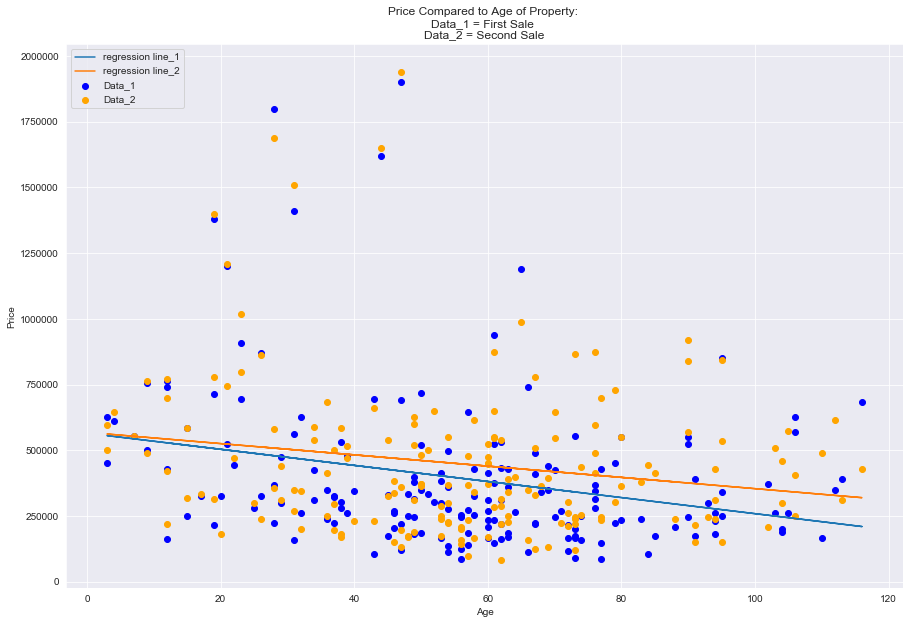

In [117]:
compare_reg_basic_and_plot(df_mulit_sale_1['age'], df_mulit_sale_1['price'], df_mulit_sale_2['age'], df_mulit_sale_2['price'], 
                           "Price Compared to Age of Property: \nData_1 = First Sale \nData_2 = Second Sale", "Age", "Price")

For houses which were sold twice, the old the house the grater the price for the second sale.

Data_1 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: 277.28
Y-Intercept: -90539.9
Correlation: 0.717
R-Squared: 0.515
----------------------------
Model: Y = 277.28 * X + -90539.9


Data_2 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: 273.41
Y-Intercept: -28832.33
Correlation: 0.717
R-Squared: 0.515
----------------------------
Model: Y = 273.41 * X + -28832.33


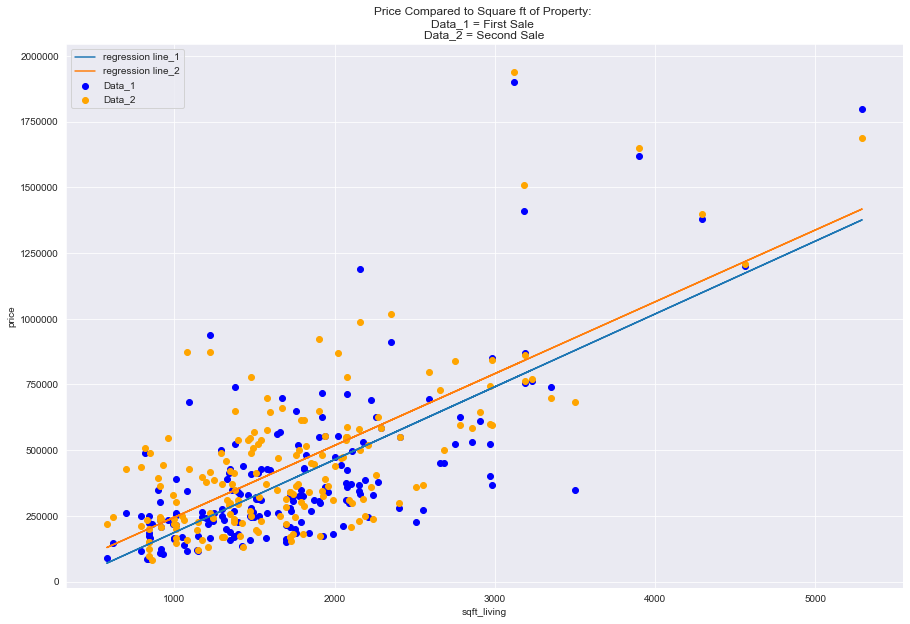

In [116]:
compare_reg_basic_and_plot(df_mulit_sale_1['sqft_living'], df_mulit_sale_1['price'], df_mulit_sale_2['sqft_living'], df_mulit_sale_2['price'], 
                           "Price Compared to Square ft of Property: \nData_1 = First Sale \nData_2 = Second Sale", "sqft_living", "price")

## Create: age since renovation column

Creating the new column

In [33]:
temp_age_since_ren = df['yr_renovated']
temp = []
i = 0
for val in temp_age_since_ren:
    if val > 0:
        val = now - df['yr_renovated'][i]
        temp.append(val)
        i += 1
    else:
        val = now - df['yr_built'][i]
        temp.append(val)
        i += 1

df['age_since_ren'] = temp

In [34]:
df['age_since_ren'].unique()

array([ 73,  51,  16,  74,  75,  27,   3,  22,  48,   8,  14,  15,  41,
        47,  30,  10,  60,  70,  38,  55,  91,  11,  29,   5,  52,  61,
        49,  63,  92,  59,  44,   2,  33,  37,  57,  17,  18,  20, 103,
        69,  94,  25,  31,  66,  13,  32,  64,  12,  35,  50,  34,  45,
        72, 116,  98,   7,  42,  39,  96,  68,  65, 105,  56,  46,  36,
        24, 114,  43,  93,  58,  67,  53,  26,  88, 110,   9,  79,  62,
        19,  23,  76,  71, 109,  95,  89,  80,  28,   6,  54,  97, 100,
       108,  40, 115,  84, 112,  86, 106,  21, 104,  77,  90, 107,  99,
        85,  83,  78, 101, 111, 113,   4,  87,  81, 102,  82,   1])

In [35]:
print(df['age'].head())
print(df['age_since_ren'].head())

date
9/9/2014     73
9/9/2014    116
9/9/2014     16
9/9/2014     74
9/9/2014     75
Name: age, dtype: int64
date
9/9/2014    73
9/9/2014    51
9/9/2014    16
9/9/2014    74
9/9/2014    75
Name: age_since_ren, dtype: int64


# Time to Renovation in Years

In [36]:
# print(df.agg({'yr_built' : ['sum', 'min', 'max', 'mean', 'median', 'mode']}))
# print(df.agg({'yr_renovated': ['sum', 'min', 'max', 'mean', 'median', 'mode']}))

In [38]:
# def time_to_renovation_cal (yr_built, yr_renovated)
#     if yr_renovated != 0:
#         Time_to_ren = yr_renovated - yr_built
#     else:
#         t

In [99]:
time_to_ren = df['yr_renovated'] - df['yr_built']
""" WARNING: if not renovated then this will = - yr_built only use this value for properties that have been renovated"""
df['time_to_ren'] = time_to_ren

In [91]:
df.head()

Unnamed: 0          id      price  bedrooms  bathrooms  sqft_living  \
date                                                                            
9/9/2014       10904  7227800055   199500.0         4       2.00         1750   
9/9/2014       12826  1421069123   214000.0         3       1.00         1020   
9/9/2014        1322  3323069084   620000.0         4       2.50         1840   
9/9/2014        8204  7227500450   222900.0         2       1.00          860   
9/9/2014       18353  1370803445  1140000.0         4       1.75         3080   

          sqft_lot  floors  waterfront  view  ...  month  day  month_year  \
date                                          ...                           
9/9/2014      8116     1.0         0.0   0.0  ...      9    9      9-2014   
9/9/2014      9147     1.0         0.0   0.0  ...      9    9      9-2014   
9/9/2014    220308     2.0         0.0   0.0  ...      9    9      9-2014   
9/9/2014      5800     1.0         0.0   0.0  ...      9    9      9-2014   
9/9/2014      6500     1.0         0.0   0.0  ...      9    9      9-2014   

           price_bands  yr_built_bands  age         is_ren  sale_count  \
date                                                                     
9/9/2014  100K to 200K           1940s   73  not_renovated           1   
9/9/2014  200K to 300K           1900s  116      renovated           1   
9/9/2014  600K to 700K           2000s   16  not_renovated           1   
9/9/2014  200K to 300K           1940s   74  not_renovated           1   
9/9/2014    900K to 1M           1940s   75  not_renovated           1   

          age_since_ren  time_to_ren  
date                                  
9/9/2014             73        -1943  
9/9/2014             51           65  
9/9/2014             16        -2000  
9/9/2014             74        -1942  
9/9/2014             75        -1941  

[5 rows x 32 columns]

If removated: show the distributuion of time to renovation.

In [96]:
sns.distplot(df_ren['time_to_ren'])

In [126]:
reg_basic_and_plot(df_ren['time_to_ren'], df_ren['price'], "Time to Renovations compared to Price", "Years to Renovation", "Price")

Basic Regression Diagnostics
----------------------------
Slope: 530.46
Y-Intercept: 738944.99
Correlation: 0.02
R-Squared: 0.0
----------------------------
Model: Y = 530.46 * X + 738944.99


Firstly lets take a look at the price distrobution.

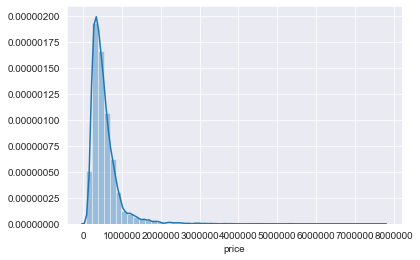

In [127]:
sns.distplot(df['price'])

Is the price is a logarithmly Scale?

In [124]:
log_price = np.log(df['price'])

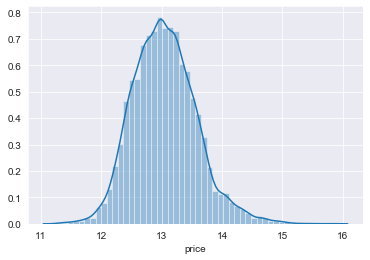

In [125]:
sns.distplot(log_price)

### Create new column with the "log price"

In [179]:
df['log_price'] = np.log(df['price'])
df.head()

Unnamed: 0          id        date     price  bedrooms  bathrooms  \
0           0  7129300520  10/13/2014  221900.0         3       1.00   
1           1  6414100192   12/9/2014  538000.0         3       2.25   
2           2  5631500400   2/25/2015  180000.0         2       1.00   
3           3  2487200875   12/9/2014  604000.0         4       3.00   
4           4  1954400510   2/18/2015  510000.0         3       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  sqft_living15  sqft_lot15  \
0         1180      5650     1.0         0.0  ...           1340        5650   
1         2570      7242     2.0         0.0  ...           1690        7639   
2          770     10000     1.0         0.0  ...           2720        8062   
3         1960      5000     1.0         0.0  ...           1360        5000   
4         1680      8080     1.0         0.0  ...           1800        7503   

   year  month  day  month_year   price_bands  yr_built_bands  age  log_price  
0  2014     10   13     13-2014  200K to 300K           1950s   61  12.309982  
1  2014     12    9      9-2014  500K to 600K           1950s   65  13.195614  
2  2015      2   25     25-2015  100K to 200K           1930s   83  12.100712  
3  2014     12    9      9-2014  600K to 700K           1960s   51  13.311329  
4  2015      2   18     18-2015  500K to 600K           1980s   29  13.142166  

[5 rows x 30 columns]

# Analysis

# Price compared to Age of property

In [130]:
reg_basic_and_plot(df['age'], df['log_price'], "Price compared to Age of property", "Age", "Log Price")

Basic Regression Diagnostics
----------------------------
Slope: -0.0
Y-Intercept: 13.11
Correlation: -0.081
R-Squared: 0.006
----------------------------
Model: Y = -0.0 * X + 13.11


### Price compared to: Time since renovation or if not renovated, Time since built.

In [132]:
reg_basic_and_plot(df['age_since_ren'], 
                   df['log_price'], 
                   "Price compared to: Time since renovation or if not renovated, Time since built.",
                  "Years Since Renovation Or Built",
                  "Log Price")

Basic Regression Diagnostics
----------------------------
Slope: -0.0
Y-Intercept: 13.14
Correlation: -0.122
R-Squared: 0.015
----------------------------
Model: Y = -0.0 * X + 13.14


Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: -0.0
Y-Intercept: 13.12
Correlation: -0.107
R-Squared: 0.011
----------------------------
Model: Y = -0.0 * X + 13.12


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -0.0
Y-Intercept: 13.48
Correlation: -0.107
R-Squared: 0.011
----------------------------
Model: Y = -0.0 * X + 13.48


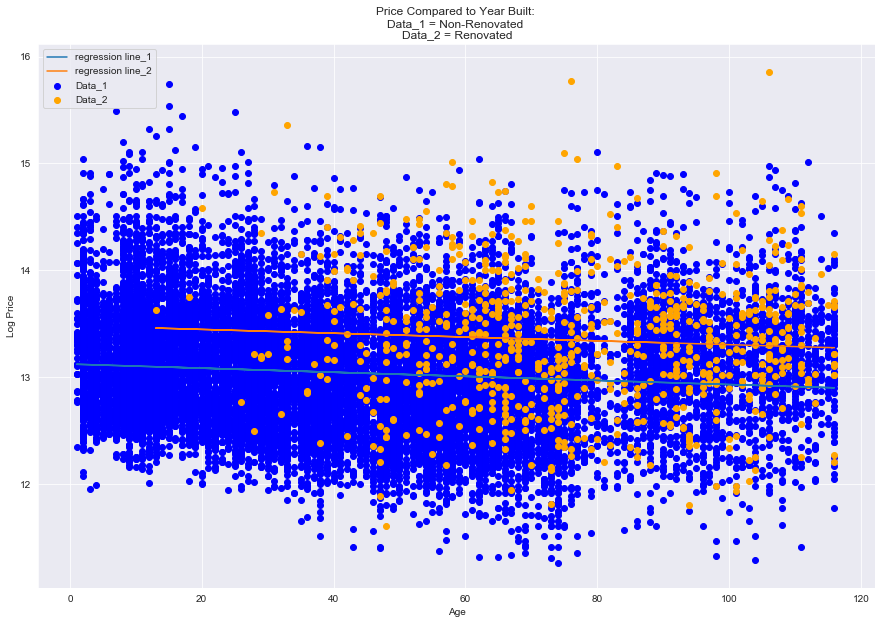

In [136]:
compare_reg_basic_and_plot(df_non_ren['age'], df_non_ren['log_price'], 
                           df_ren['age'], df_ren['log_price'], 
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Age", "Log Price",)

In [56]:
print(df_ren['age'].median())
print(df_non_ren['age'].median())


print(df_ren['age_since_ren'].median())

# year_biuilt - year renovated  = years since renovated.

NameError: name 'df_ren' is not defined

### Brake down in to Decade Class for year built

In [57]:
non_ren_age = df_non_ren.loc[df_non_ren['age'] < 1950, ['age']]
non_ren_price = df_non_ren.loc[df_non_ren['age'] < 1950, ['price']]

ren_age = df_ren.loc[df_ren['age'] < 1950, ['age']]
ren_price = df_ren.loc[df_ren['age'] < 1950, ['price']]

NameError: name 'df_ren' is not defined

In [ ]:
compare_reg_basic_and_plot(non_ren_age, non_ren_price, ren_age, ren_price,
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated")

### Now broken down into decade bins:

In [ ]:
sns.barplot(sorted(df['yr_built_bands']), df['price'])

In [ ]:
sns.barplot(df, df['yr_built_bands'], df['yr_renovated'])

In [ ]:
p = sns.FacetGrid(df, col=['df[price_bands]'], row=df['is_ren'])
p = p.map(plt.hist, 'age')

In [ ]:
g = sns.FacetGrid(df, 
              col=sorted(df['yr_built_bands']), 
                         row=sorted(df['price_bands']))

g = g.map(plt.scatter, "price", "age")

# 1a. Data Frame - Renovated House's



Create a new DataFrame but just for houses which have been renovated

In [134]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [59]:
df_ren.head()

Unnamed: 0          id     price  bedrooms  bathrooms  sqft_living  \
date                                                                           
9/9/2014       12826  1421069123  214000.0         3       1.00         1020   
9/9/2014        4764  4045500130  154000.0         2       1.00         1040   
9/8/2014       14837  2301400276  865000.0         4       2.50         2520   
9/8/2014          95  1483300570  905000.0         4       2.50         3300   
9/8/2014        5577   537000130  360000.0         1       2.25         2060   

          sqft_lot  floors  waterfront  view  ...  year  month  day  \
date                                          ...                     
9/9/2014      9147     1.0         0.0   0.0  ...  2014      9    9   
9/9/2014     20524     1.0         0.0   3.0  ...  2014      9    9   
9/8/2014      4950     2.0         0.0   0.0  ...  2014      9    8   
9/8/2014     10250     1.0         0.0   0.0  ...  2014      9    8   
9/8/2014     10600     1.5         0.0   0.0  ...  2014      9    8   

          month_year   price_bands  yr_built_bands  age     is_ren  \
date                                                                 
9/9/2014      9-2014  200K to 300K           1900s  116  renovated   
9/9/2014      9-2014  100K to 200K           1940s   67  renovated   
9/8/2014      8-2014  800K to 900K           1900s  110  renovated   
9/8/2014      8-2014    900K to 1M           1940s   70  renovated   
9/8/2014      8-2014  300K to 400K           1920s   89  renovated   

          sale_count  age_since_ren  
date                                 
9/9/2014           1             51  
9/9/2014           1             27  
9/8/2014           1             14  
9/8/2014           1             25  
9/8/2014           1             33  

[5 rows x 31 columns]

In [60]:
df_ren.shape

(744, 31)

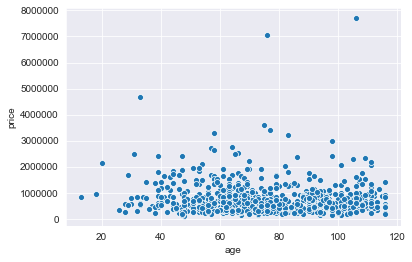

In [61]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

Basic Regression Diagnostics
----------------------------
Slope: -1908.09
Y-Intercept: 914955.28
Correlation: -0.067
R-Squared: 0.005
----------------------------
Model: Y = -1908.09 * X + 914955.28


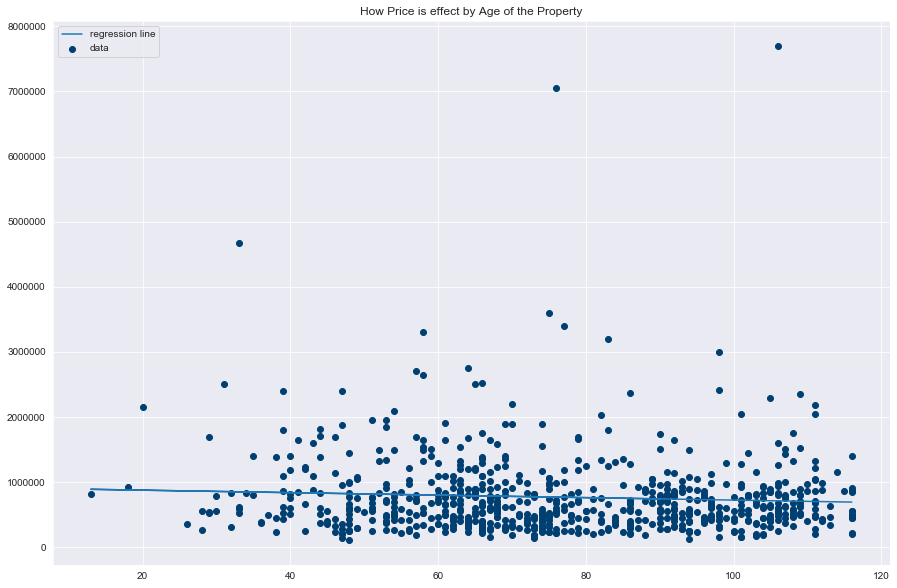

In [62]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], "How Price is effect by Age of the Property")

### Analysis - Renovated House's 
From the above progression it shows that for every year the price will decrease by just over $2000 . This is a substanitall amount of money but is it significant compared to houses that have not been renovated?

First though as the equation is:

    Price = (-2045.39 * Age) + 924176.48
    
So lets look at the median house age and return the price.

In [63]:
df_ren['age'].median()

74.5

In [64]:
-2045.39*(df_ren['age'].median()) + 924176.48

771794.925

In [206]:
df_ren.columns

Index(['Unnamed: 0', 'id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'month_year', 'price_bands', 'yr_built_bands', 'age', 'is_ren',
       'sale_count', 'age_since_ren', 'time_to_ren', 'log_price'],
      dtype='object')

In [209]:
df_ren['time_to_ren'].mode()

0    43
1    63
dtype: int64

Check the correlation:

In [177]:
df_ren.corr()['log_price'].sort_values(ascending=False)

log_price        1.000000
price            0.858997
grade            0.788711
sqft_living      0.739443
sqft_living15    0.679964
bathrooms        0.638677
sqft_above       0.633082
sqft_basement    0.468509
view             0.439309
lat              0.370271
bedrooms         0.366771
floors           0.358777
waterfront       0.243012
yr_renovated     0.197051
time_to_ren      0.070625
yr_built         0.063537
id               0.033127
day              0.021738
month            0.016470
condition        0.014798
Unnamed: 0       0.012737
sqft_lot15      -0.003099
sqft_lot        -0.005056
zipcode         -0.035487
sale_count      -0.048999
year            -0.062865
age             -0.063537
long            -0.181986
age_since_ren   -0.197051
Name: log_price, dtype: float64

# 1b. DataFrame - Non_Renovated House's

There was a house that it's year built was zero so it must be excluded from this data frame.

In [133]:
df_non_ren = df.loc[(df['yr_renovated'] == 0) & (df['yr_built'] != 0)]

In [67]:
df_non_ren.head()

Unnamed: 0          id      price  bedrooms  bathrooms  sqft_living  \
date                                                                            
9/9/2014       10904  7227800055   199500.0         4       2.00         1750   
9/9/2014        1322  3323069084   620000.0         4       2.50         1840   
9/9/2014        8204  7227500450   222900.0         2       1.00          860   
9/9/2014       18353  1370803445  1140000.0         4       1.75         3080   
9/9/2014       10310   325049234   925000.0         4       2.50         3110   

          sqft_lot  floors  waterfront  view  ...  year  month  day  \
date                                          ...                     
9/9/2014      8116     1.0         0.0   0.0  ...  2014      9    9   
9/9/2014    220308     2.0         0.0   0.0  ...  2014      9    9   
9/9/2014      5800     1.0         0.0   0.0  ...  2014      9    9   
9/9/2014      6500     1.0         0.0   0.0  ...  2014      9    9   
9/9/2014     11422     2.0         0.0   0.0  ...  2014      9    9   

          month_year   price_bands  yr_built_bands  age         is_ren  \
date                                                                     
9/9/2014      9-2014  100K to 200K           1940s   73  not_renovated   
9/9/2014      9-2014  600K to 700K           2000s   16  not_renovated   
9/9/2014      9-2014  200K to 300K           1940s   74  not_renovated   
9/9/2014      9-2014    900K to 1M           1940s   75  not_renovated   
9/9/2014      9-2014    900K to 1M           1980s   27  not_renovated   

          sale_count  age_since_ren  
date                                 
9/9/2014           1             73  
9/9/2014           1             16  
9/9/2014           1             74  
9/9/2014           1             75  
9/9/2014           1             27  

[5 rows x 31 columns]

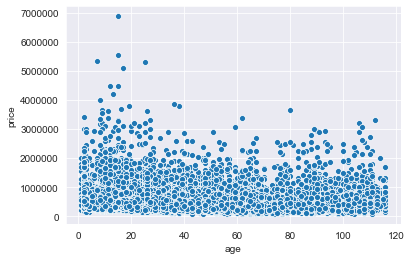

In [68]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

In [69]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], "How Price is effect by Age of the Property, If a Renovation has been done")

Basic Regression Diagnostics
----------------------------
Slope: -996.35
Y-Intercept: 575865.79
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -996.35 * X + 575865.79


### Analysis - If house not Renovated:

I this case the house price does decrease, but only by $996.65 per year. 

Benifit of not renovating: re

Just checking that all the non-renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [70]:
# sorted(df_non_ren['yr_built'].unique())

## Comparing the finding the mean age of the building in each zipcode.

In [71]:
#found Mean price values of houses in each zipcode
stats_zipcode = df.groupby(['zipcode'])['age'].mean().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
mean_zipcode = df_stats_zipcode.rename(columns={"age": "mean_price"})
mean_zipcode.mean_price = mean_zipcode.mean_price.astype('float64')
df_mean_zipcode = pd.DataFrame(mean_zipcode)
df_mean_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Mean Price in each Zipcode')
# # df_mean_zipcode = df_stats_zipcode.rename(columns={"price": "mean_price"})
# # df2 = df_mean_zipcode['mean_price'].astype('float64')
# # sns.distplot(df_mean_zipcode)
# sns.barplot(x = ['zipcode'], y = ['mean_price'])
# # #clean this graph a little more

Text(0.5, 1.0, 'Mean Price in each Zipcode')

Check differance by median:

In [114]:
stats_zipcode = df.groupby(['zipcode'])['age'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"age": "median_price"})
median_zipcode.median_price = median_zipcode.median_price.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median Age in each Zipcode')

Text(0.5, 1.0, 'Median Age in each Zipcode')

Look and median extra space in each zipxode

In [184]:
stats_zipcode = df.groupby(['zipcode'])['extra_space'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "extra_space"})
median_zipcode.extra_space = median_zipcode.extra_space.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')

Text(0.5, 1.0, 'Median extra_space in each Zipcode')

In [185]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="extra_space",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

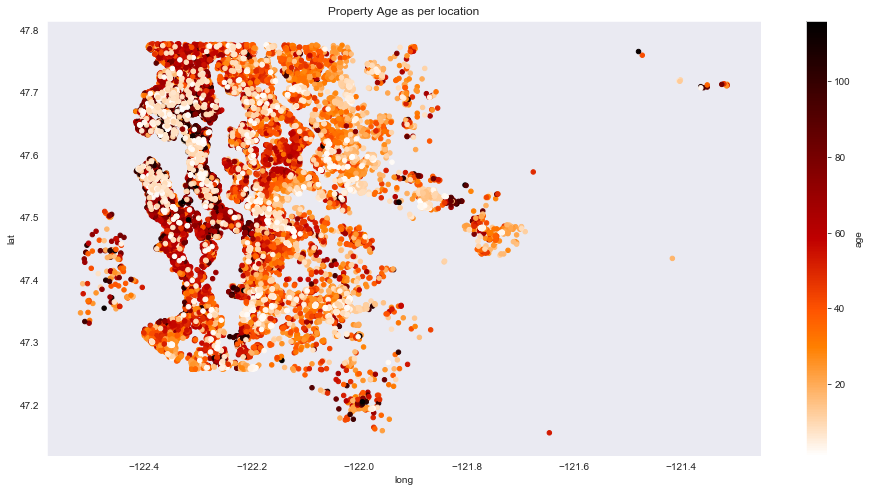

In [210]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="age",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Part 2 - Breaking the Houses Clasifications 

In this section we will be breaking down the houses into further catagorise and comapreing the non-renovated top the renovated in diffent metrics:

    2a. Price Bands
    2b. Number of Bedrooms
    2c. Number of Bathrooms
    2d. sqft_lot
    2e. sqft_living
    2f. Building Condition
    2g. Building Grade

### 2a. Price Band - Renovated

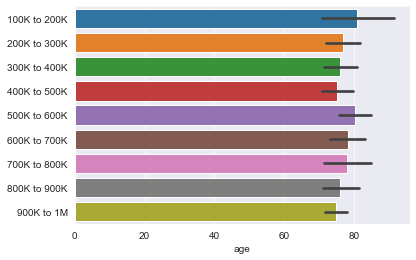

In [73]:
sns.barplot(y=sorted(df_ren['price_bands']), x=df_ren['age']) # title="Price Bands to age of property"

In [74]:
sns.scatterplot(y=sorted(df_ren['condition']), x=df_ren['grade'])

In [75]:
# df_ren.set_index(df_ren['price_bands'])

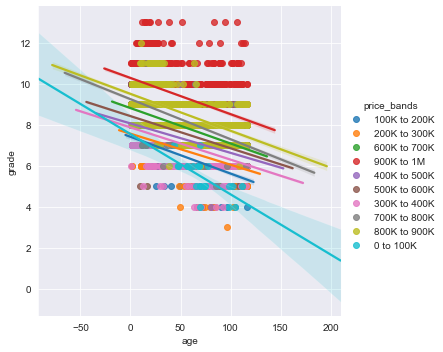

In [76]:
sns.lmplot(data=df, x="age", y="grade", hue="price_bands")

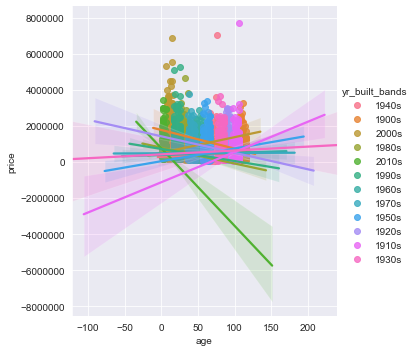

In [77]:
sns.lmplot(data=df, x="age", y="price", hue="yr_built_bands")

In [78]:
# reg_basic_and_plot()

## Renovated - Bedrooms

In [79]:
sns.barplot(x=df_ren['bedrooms'], y=df_ren['price'])

## 2e. Square foot living

Basic Regression Diagnostics
----------------------------
Slope: 280.86
Y-Intercept: -43995.6
Correlation: 0.702
R-Squared: 0.493
----------------------------
Model: Y = 280.86 * X + -43995.6


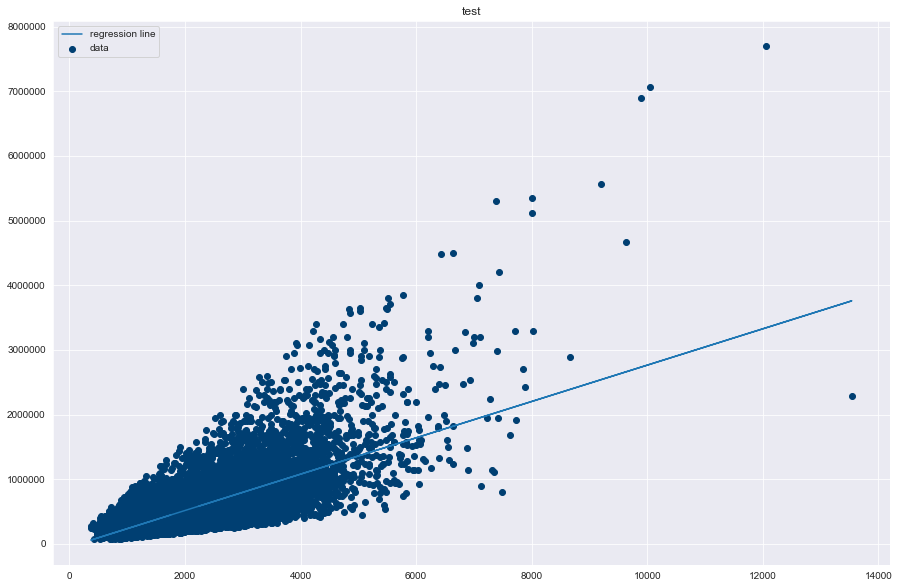

In [80]:
reg_basic_and_plot(df['sqft_living'], df['price'], 'test')

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: 269.86
Y-Intercept: -26881.62
Correlation: 0.698
R-Squared: 0.487
----------------------------
Model: Y = 269.86 * X + -26881.62


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 462.2
Y-Intercept: -306809.85
Correlation: 0.698
R-Squared: 0.487
----------------------------
Model: Y = 462.2 * X + -306809.85


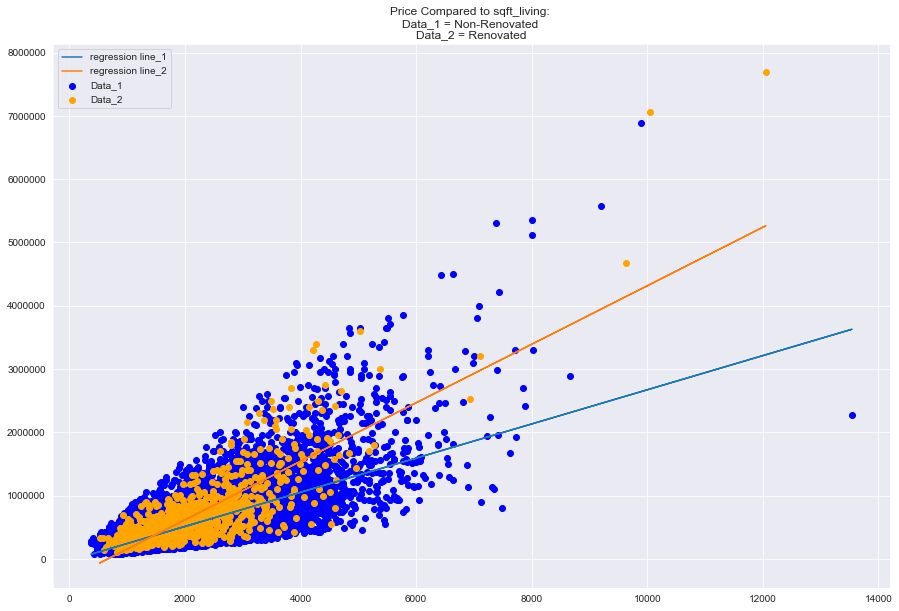

In [81]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['price'], df_ren['sqft_living'], df_ren['price'], 
                           "Price Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

### Square foot living compared to square foot lot

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: 8.02
Y-Intercept: -1560.41
Correlation: 0.176
R-Squared: 0.031
----------------------------
Model: Y = 8.02 * X + -1560.41


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 4.09
Y-Intercept: 6696.75
Correlation: 0.176
R-Squared: 0.031
----------------------------
Model: Y = 4.09 * X + 6696.75


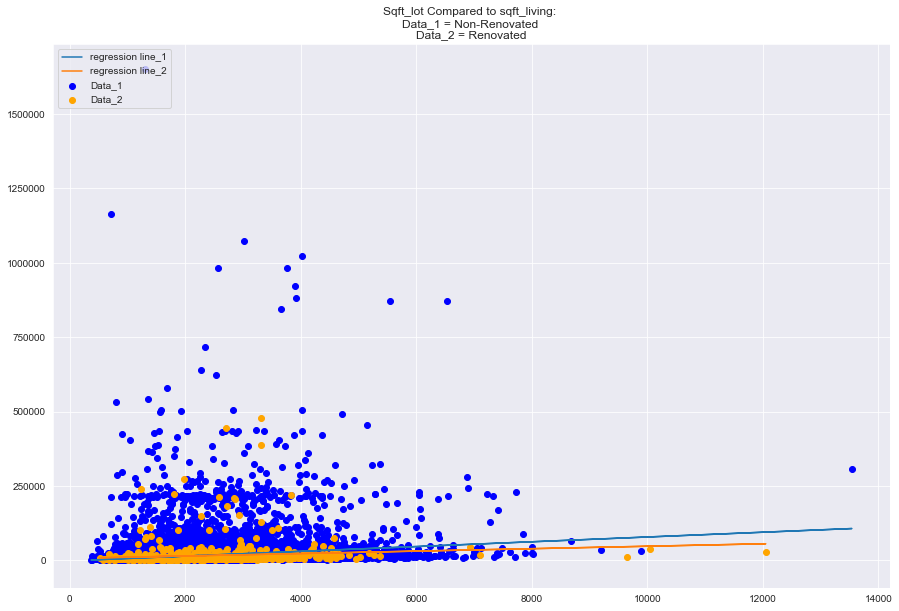

In [82]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['sqft_lot'], df_ren['sqft_living'], df_ren['sqft_lot'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

This shows that living_space/lot_space  decrease if renovation is completed.

In [181]:
df['extra_space'] = df['sqft_lot'] - df['sqft_living']

## 2f. Condition

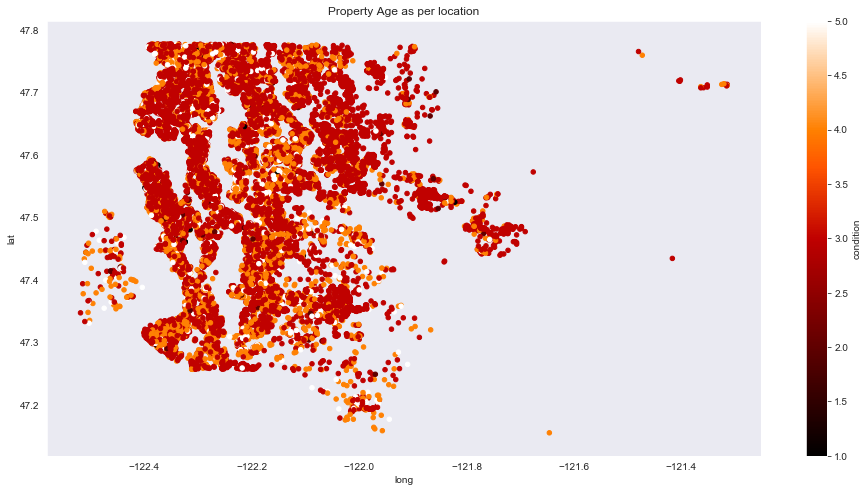

In [197]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="condition",
             cmap="gist_heat", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: 23793.42
Y-Intercept: 450860.41
Correlation: 0.044
R-Squared: 0.002
----------------------------
Model: Y = 23793.42 * X + 450860.41


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 36913.27
Y-Intercept: 650074.9
Correlation: 0.044
R-Squared: 0.002
----------------------------
Model: Y = 36913.27 * X + 650074.9


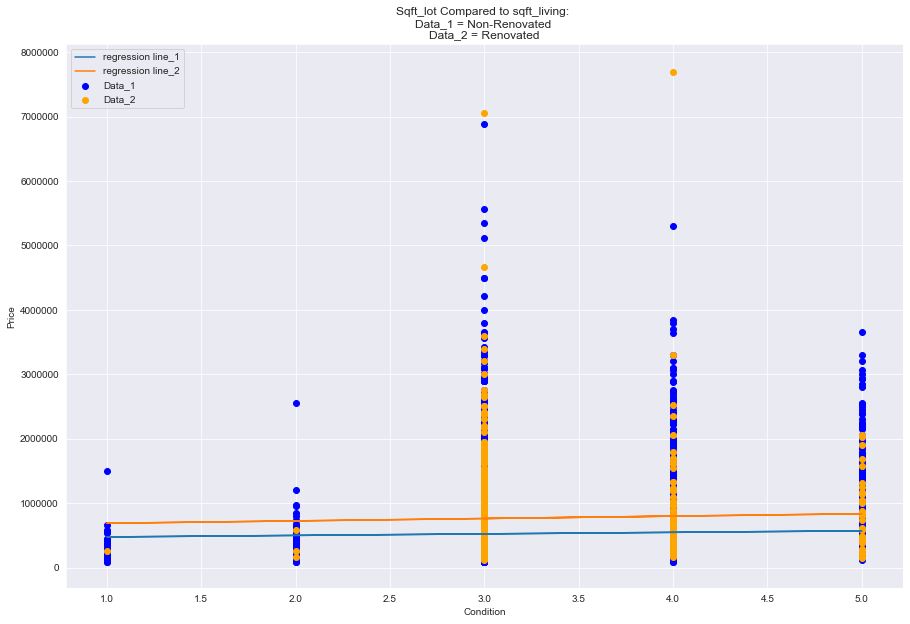

In [178]:
compare_reg_basic_and_plot(df_non_ren['condition'], df_non_ren['price'], 
                           df_ren['condition'], df_ren['price'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Condition", "Price")

In [83]:
sns.distplot(df['condition'])

In [211]:
(len(df_bad_condition)/len(df))*100

0.9215096087057189

In [215]:
902107*0.009215096087057189

8313.0026858069

In [84]:
df['condition'].describe()

count    21595.000000
mean         3.409771
std          0.650480
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [193]:
df_bad_condition = df.loc[df['condition'] < 3]
df_bad_condition.describe()

Unnamed: 0            id         price    bedrooms   bathrooms  \
count    199.000000  1.990000e+02  1.990000e+02  199.000000  199.000000   
mean   10168.010050  4.267549e+09  3.300570e+05    2.814070    1.424623   
std     5672.247093  2.871220e+09  2.503306e+05    0.985041    0.553316   
min       36.000000  7.200080e+06  7.800000e+04    1.000000    0.750000   
25%     5152.500000  1.900000e+09  1.895000e+05    2.000000    1.000000   
50%    10776.000000  3.501100e+09  2.790000e+05    3.000000    1.000000   
75%    14930.000000  6.803000e+09  4.025000e+05    3.000000    1.750000   
max    19605.000000  9.828702e+09  2.560000e+06    6.000000    3.000000   

       sqft_living      sqft_lot      floors  waterfront        view  ...  \
count   199.000000  1.990000e+02  199.000000  199.000000  199.000000  ...   
mean   1395.628141  3.117163e+04    1.158291    0.010050    0.110553  ...   
std     668.355046  9.612199e+04    0.327709    0.099997    0.557628  ...   
min     410.000000  1.638000e+03    1.000000    0.000000    0.000000  ...   
25%     935.000000  6.000000e+03    1.000000    0.000000    0.000000  ...   
50%    1270.000000  8.400000e+03    1.000000    0.000000    0.000000  ...   
75%    1685.000000  1.615300e+04    1.000000    0.000000    0.000000  ...   
max    5440.000000  1.164794e+06    2.000000    1.000000    4.000000  ...   

              lat        long  sqft_living15     sqft_lot15         year  \
count  199.000000  199.000000     199.000000     199.000000   199.000000   
mean    47.532821 -122.244839    1618.075377   18136.145729  2014.407035   
std      0.122133    0.147416     476.132313   41629.734189     0.492521   
min     47.249500 -122.509000     860.000000    1138.000000  2014.000000   
25%     47.464200 -122.341000    1300.000000    6000.000000  2014.000000   
50%     47.531900 -122.293000    1530.000000    8100.000000  2014.000000   
75%     47.624100 -122.177000    1855.000000   10868.500000  2015.000000   
max     47.775800 -121.769000    3890.000000  386812.000000  2015.000000   

            month         day         age   log_price   extra_space  
count  199.000000  199.000000  199.000000  199.000000  1.990000e+02  
mean     6.190955   15.618090   69.778894   12.535413  2.977601e+04  
std      3.569472    9.087947   23.959380    0.560425  9.608230e+04  
min      1.000000    1.000000   21.000000   11.264464  3.500000e+02  
25%      3.000000    7.000000   52.000000   12.152141  5.045000e+03  
50%      6.000000   16.000000   67.000000   12.538967  7.150000e+03  
75%      9.000000   24.000000   90.000000   12.905431  1.424150e+04  
max     12.000000   31.000000  116.000000   14.755518  1.164084e+06  

[8 rows x 27 columns]

In [194]:
df_bad_condition.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

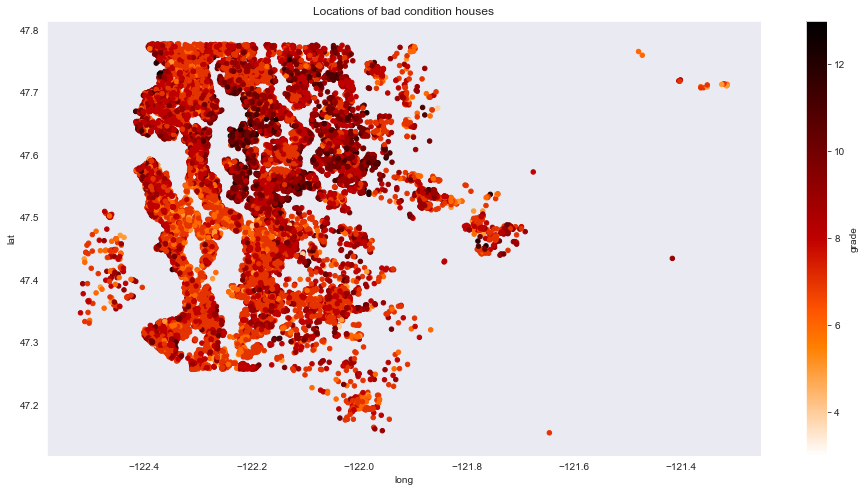

In [219]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="grade",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

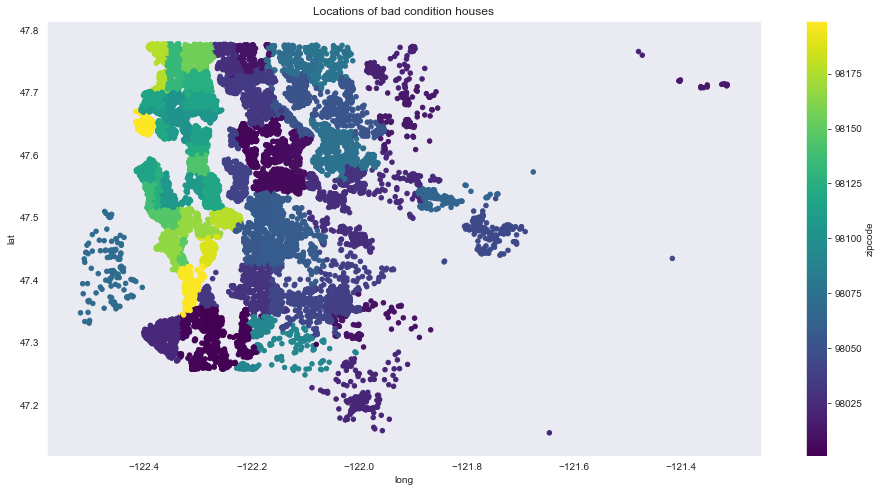

In [223]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="zipcode",
             cmap="viridis", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Locations of bad condition houses')
plt.show()

In [225]:
len(df['zipcode'].unique())

70

In [217]:
stats_zipcode = df.groupby(['zipcode'])['condition'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "condition"})
median_zipcode.extra_space = median_zipcode.condition.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


TypeError: no numeric data to plot

In [199]:
def averages_dist_comparison(average, y_condition, x_condition, title):
    stats_zipcode = df.groupby([y_condition])[x_condition].average().apply(lambda x: format(x, 'f'))
    df_stats_zipcode = pd.DataFrame(stats_zipcode)
    median_zipcode = df_stats_zipcode.rename(columns={"y_condition": "x_condition"})
    median_zipcode.extra_space = median_zipcode.extra_space.astype('float64')
    df_median_zipcode = pd.DataFrame(median_zipcode)
    df_median_zipcode.sort_values('y_condition').plot(kind='barh', figsize=(15,15))
    plt.title(title)

In [201]:
averages_dist_comparison('median', 'zipcode','condition', "test")

KeyError: 'Column not found: conditon'